In [1]:
# imports
import os, glob, pickle,random
import librosa
import librosa.display
import soundfile
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#DataFlair - Emotions to observe
observed_emotions=['neutral', 'calm', 'happy', 'sad','angry','fearful', 'disgust','surprised']

In [34]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel, tonnetz, bandwidth):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, mel))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, tonnetz))
        if bandwidth:
            bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, bandwidth))
        flatness = np.mean(librosa.feature.spectral_flatness(y=X))
        contrast = np.mean(librosa.feature.spectral_contrast(y=X))
        result = np.hstack((result, flatness, contrast))
    return (X, result)

In [39]:
#DataFlair - Load the data and extract features for each sound file
cwd = os.getcwd()
def load_data(glob_pattern=cwd+"/dataset/Actor_*/*.wav"):
    X,x,y=[],[],[]
    for file in glob.glob(glob_pattern):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        Xo, feature=extract_feature(file, mfcc=True, chroma=True, mel=True, tonnetz=True, bandwidth=False)
        X.append(Xo)
        x.append(feature)
        y.append(emotion)
    return X,x,y

In [40]:
X,x,y = load_data()

In [14]:
def plot_emo_specs(x,y,emos,n):
    index = 1
    plt.figure()
    emo_data = dict()
    nemos = len(emos)
    fig = plt.figure(figsize=(n*7,nemos*5))
    # plt.tight_layout()
    # ax = plt.subplot(len(emos), n, 1)
    for emo in observed_emotions:
        xys = [xyi for xyi in zip(x, y) if xyi[1] == emo]
        # print(xys)
        # ax = plt.subplot(nemos, n, index)
        emo_data[emo] = random.sample(xys, n)
        for i, samp in enumerate(emo_data[emo]):
            ax = plt.subplot(nemos, n, index)
            ax.title.set_text(emo+' '+str(i+1))
            M = librosa.feature.melspectrogram(y=samp[0])
            librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time')
            index += 1
    plt.show()

<Figure size 432x288 with 0 Axes>

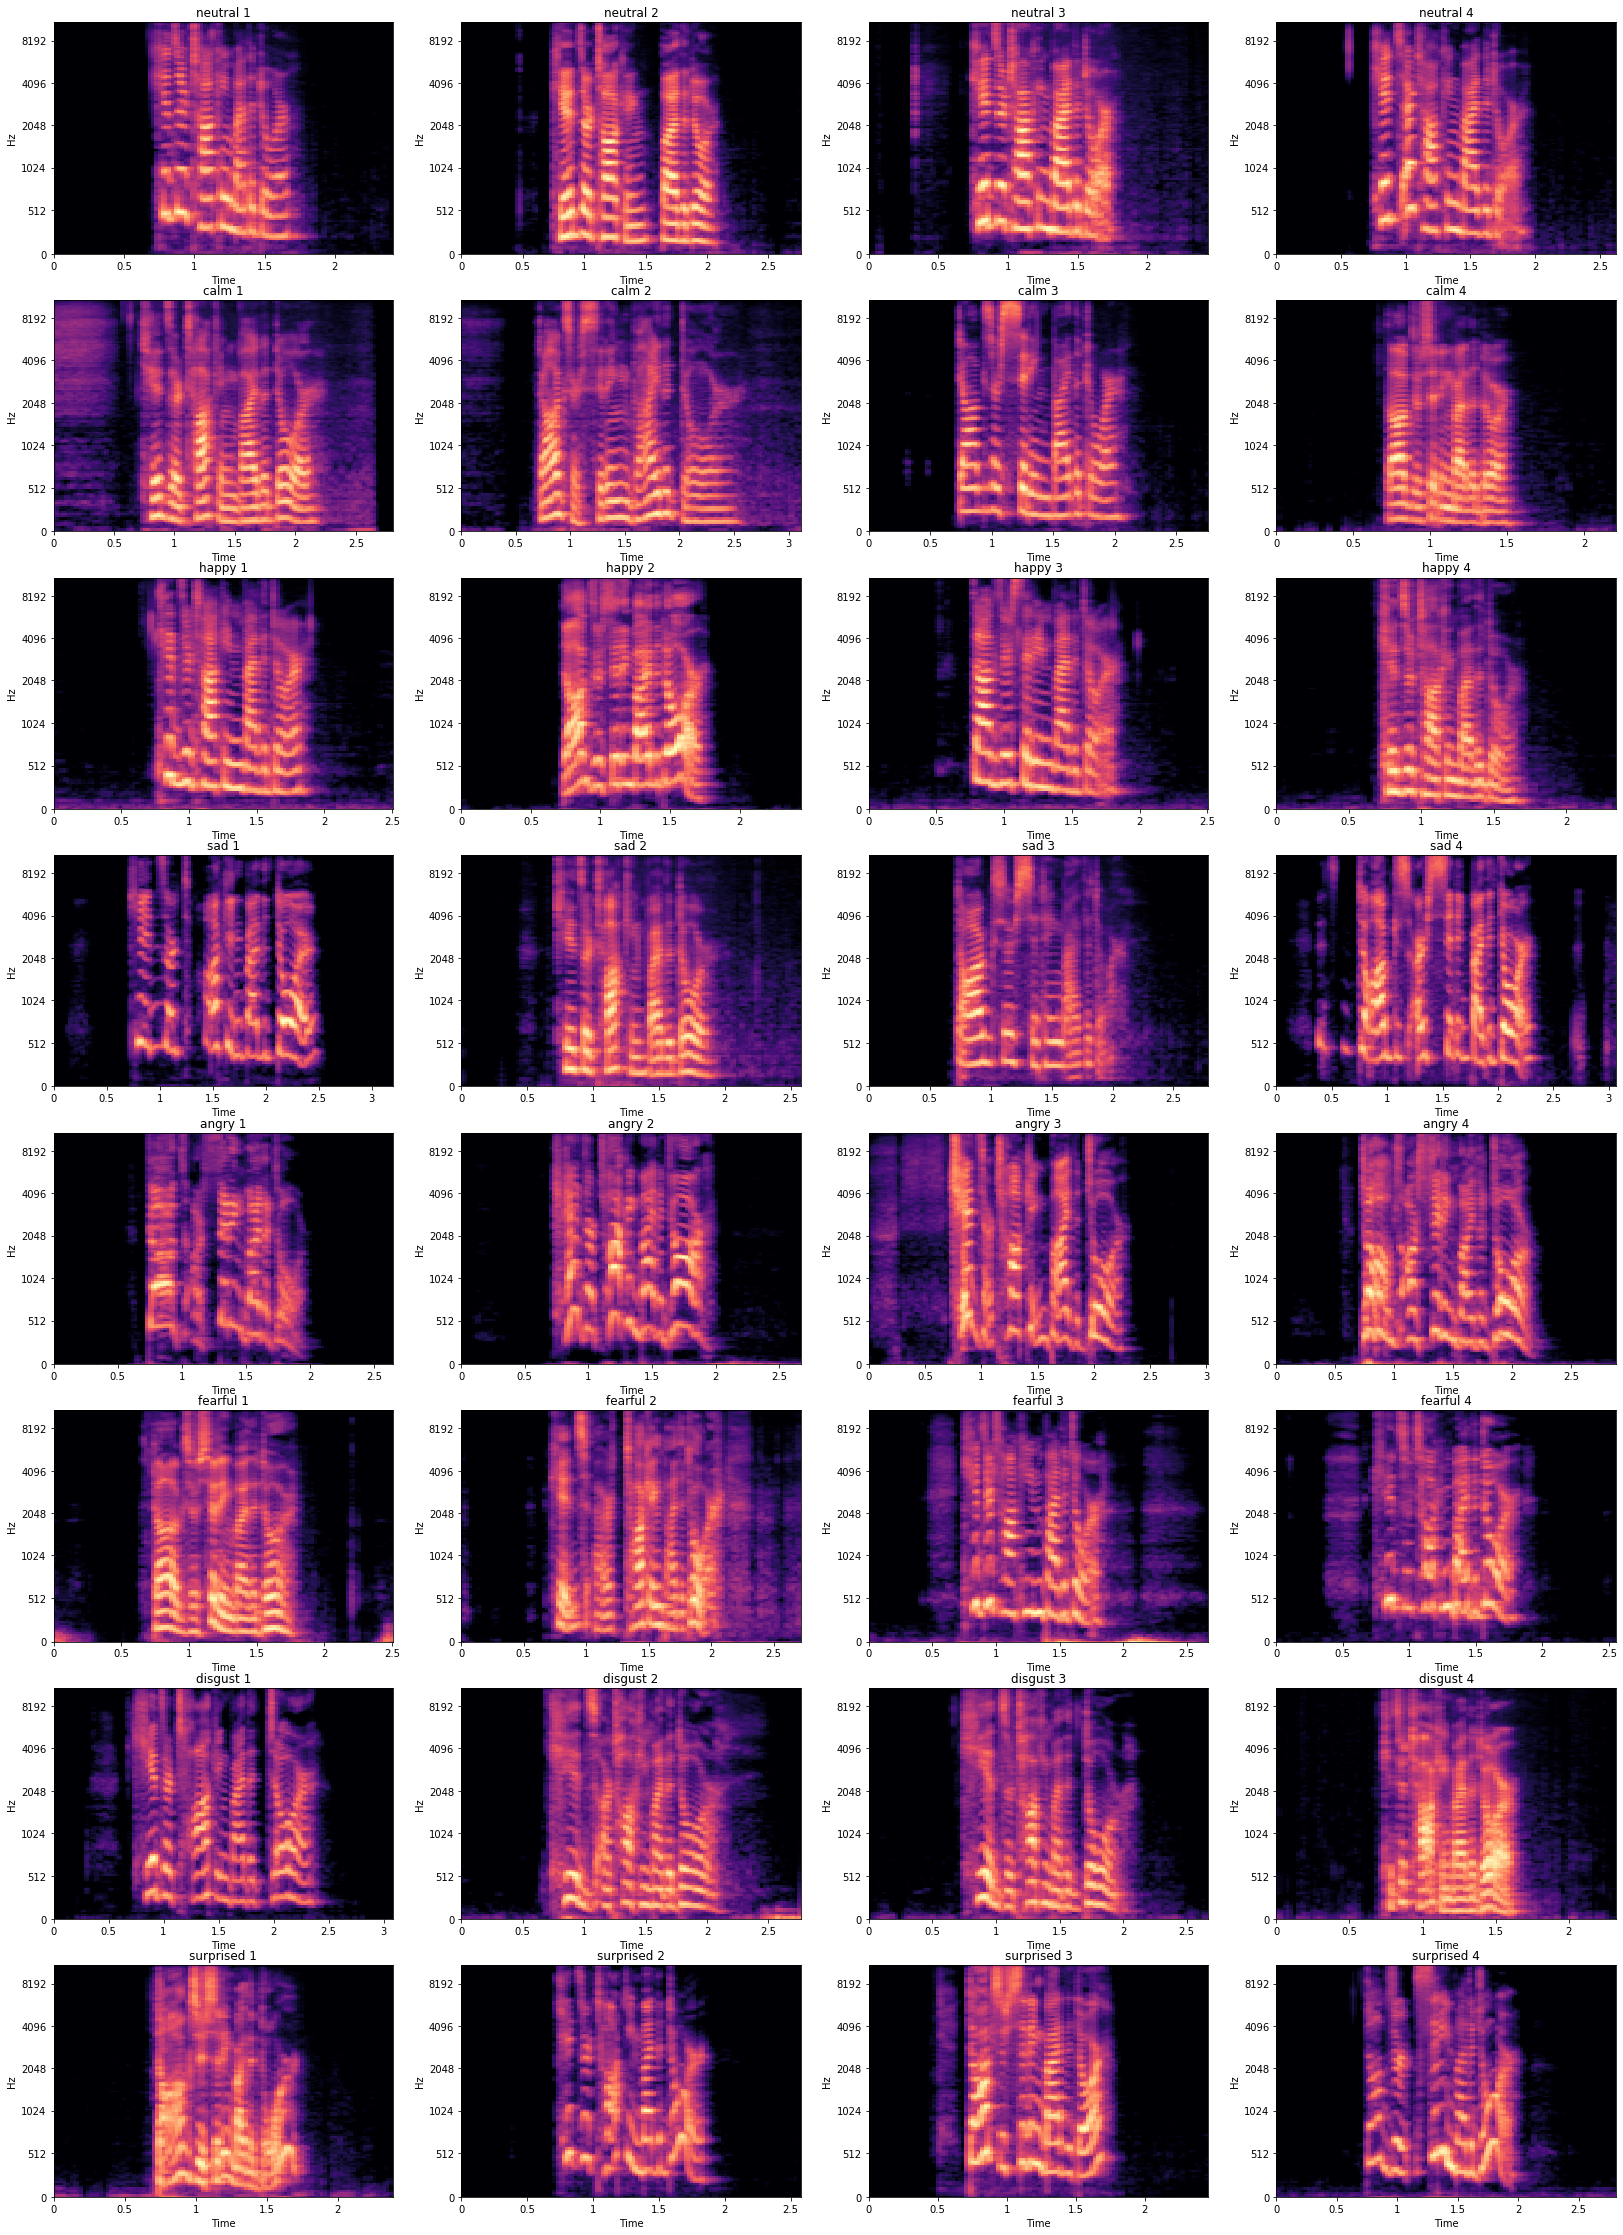

In [15]:
plot_emo_specs(X,y,observed_emotions, n=4)

In [182]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test = train_test_split(np.array(x), y, test_size=0.2, random_state=9)

In [ ]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

In [ ]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

In [17]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(500,250,125,), learning_rate='adaptive', max_iter=500)

In [180]:
#DataFlair - Train the model
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500, 250, 125), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [62]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [63]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 35.42%


In [183]:
# Using KNN For the same train-test-split data
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
# Accuracy of KNN classifier
knn_accuracy=accuracy_score(y_true=y_test, y_pred=knn_pred)
print("Accuracy: {:.2f}%".format(knn_accuracy*100))

Accuracy: 34.38%


In [ ]:
from sklearn.metrics import plot_confusion_matrix

# pax = plt.figure(figsize=(30,30))
plot_confusion_matrix(model, x_test, y_test,
                      display_labels=observed_emotions,
                      cmap=plt.cm.Blues, xticks_rotation='vertical')
fig.ax_.set_title("Emotion detection confusion matrix")


# Improvements
- Ensemble classifier
- More features
    - librosa documentation
- Evolution of signal over time?

In [6]:
# Apply KNN Classifier using the same features
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [43]:
# Classifiers - K-Nearest Neighbor, Support Vector Machine and Decision Tree Classifier

# n=20 seems to be optimal
knn = neighbors.KNeighborsClassifier(20)
svm_clf = svm.SVC()
dtc = tree.DecisionTreeClassifier(max_depth=4)
nb = naive_bayes.GaussianNB()

# Newton-cg handles multinomial loss (for multiclass problems)
lr = linear_model.LogisticRegression(solver='newton-cg')

# Cross Validation using K-Fold
kf = KFold(n_splits=10, random_state=9)

In [44]:
#Scores for different K-folds
knn_score = cross_val_score(knn, np.array(x), y, cv=kf)
svm_score = cross_val_score(svm_clf, np.array(x), y, cv=kf)
dtc_score = cross_val_score(dtc, np.array(x), y, cv=kf)
nb_score = cross_val_score(nb, np.array(x), y, cv=kf)
lr_score = cross_val_score(lr, np.array(x), y, cv=kf)

#Mean of scores of all folds per model
print("K-NearestNeighbors Mean cross validation score: ", np.mean(knn_score))
print("SupportVectorMachine Cross Val Score: ", np.mean(svm_score))
print("DecisionTreeClassifier Cross Val Score: ", np.mean(dtc_score))
print("NaiveBayesGaussian Cross Val Score: ", np.mean(nb_score))
print("LogisticRegression Cross Val Score: ", np.mean(lr_score))

/Users/karimgrytsenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/karimgrytsenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/karimgrytsenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/karimgryt

K-NearestNeighbors Mean cross validation score:  0.3263888888888889
SupportVectorMachine Cross Val Score:  0.2826388888888889
DecisionTreeClassifier Cross Val Score:  0.28194444444444444
NaiveBayesGaussian Cross Val Score:  0.2743055555555556
LogisticRegression Cross Val Score:  0.4229166666666667


In [186]:
import pickle
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)
with open('knn.pickle', 'wb') as f:
    pickle.dump(knn, f)
    

In [ ]:
K-NearestNeighbors Mean cross validation score:  0.3145833333333333
SupportVectorMachine Cross Val Score:  0.2548611111111111
DecisionTreeClassifier Cross Val Score:  0.2861111111111111
NaiveBayesGaussian Cross Val Score:  0.2743055555555556
LogisticRegression Cross Val Score:  0.3951388888888889